In [589]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [590]:
#loading the dataset
train =pd.read_csv("train_agriculture.csv")
test =pd.read_csv("test_agriculture.csv")

In [591]:
#EDA

In [592]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [593]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,NaN,0,2,NaN
1,F00000007,410,1,1,1,0,0.0,0,2,NaN
2,F00000011,626,1,0,1,0,0.0,0,2,NaN
3,F00000013,731,1,0,1,0,0.0,0,2,NaN
4,F00000014,789,0,0,1,0,0.0,0,1,NaN


In [594]:
print(train.shape,test.shape)

(4599, 10) (1199, 10)


In [595]:
train1 = train.drop(columns=['ID' ])

In [596]:
test1 = test.drop(columns=['ID' ])

In [597]:
print(train1.shape,test1.shape)

(4599, 9) (1199, 9)


In [598]:
duplicate = train1[train1.duplicated()] 
duplicate

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
6,448,0,1,1,0,NaN,0,2,1
19,2401,1,1,1,0,0.0,0,2,1
3153,1478,1,0,3,20,45.0,0,1,1
4045,577,0,1,2,15,NaN,11,2,0
4063,577,0,1,2,40,NaN,3,2,0


In [599]:
duplicate = test1[test1.duplicated()] 
duplicate

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage


In [600]:
print(train1.columns)

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')


In [601]:
test1.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [602]:
train1.isnull().values.any()

True

In [603]:
test1.isnull().values.any()

True

In [604]:
train1.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

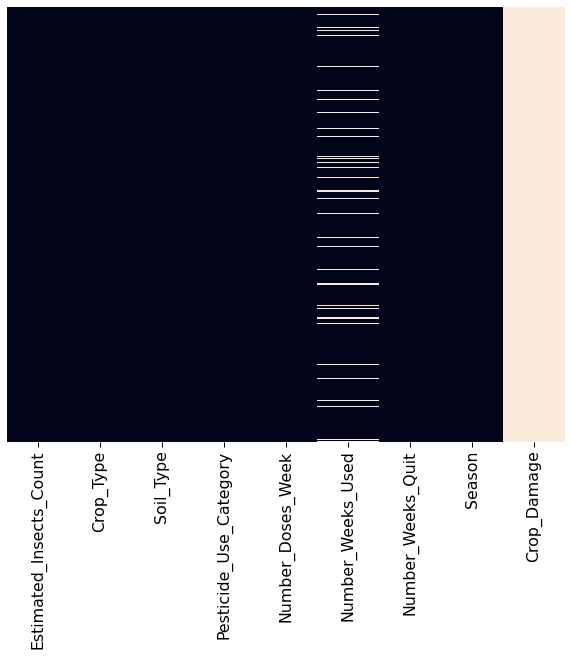

In [605]:
plt.figure(figsize=(10,8))
sns.heatmap(test1.isnull(),yticklabels=False,cbar=False)

In [606]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           119
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [607]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [608]:
train1['Number_Weeks_Used'].fillna(train1['Number_Weeks_Used'].mean(),inplace=True)

In [609]:
test1['Number_Weeks_Used'].fillna(test1['Number_Weeks_Used'].mean(),inplace=True)

In [610]:
train1.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [611]:
test1.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [612]:
test1.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [613]:
train1.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [614]:
train1['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

In [615]:
train1['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

In [616]:
train1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [617]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['city']=le.fit_transform(df['city'])

list1=['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season','Crop_Damage']
for val in list1:
   train2[val]=le.fit_transform(train2[val].astype(str))

Text(0.5, 1.0, 'correlation with target variable')

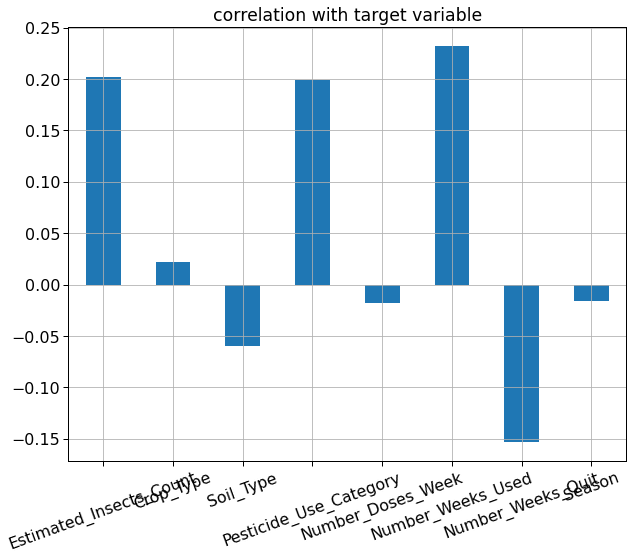

In [618]:
#checking correlation with the target variable
plt.figure(figsize=(10,8))
train1.drop('Crop_Damage',axis=1).corrwith(train1['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [619]:
train1.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

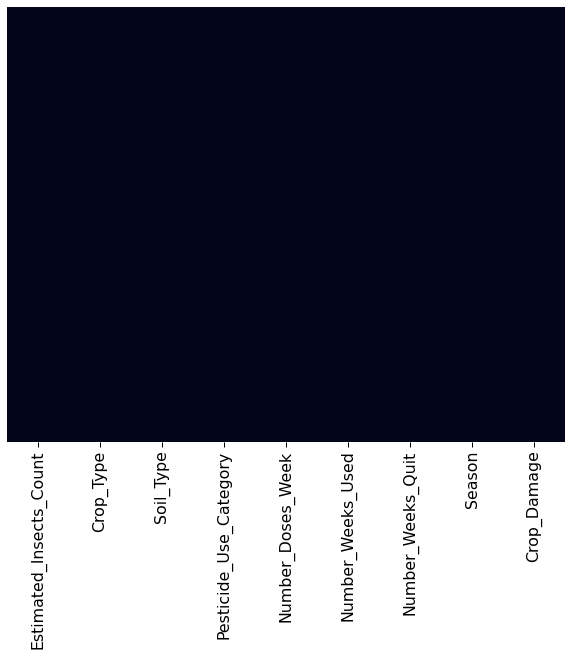

In [620]:
plt.figure(figsize=(10,8))
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False)

In [621]:
#checking skewness

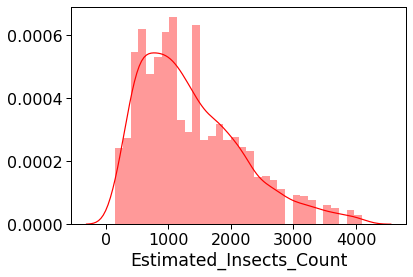

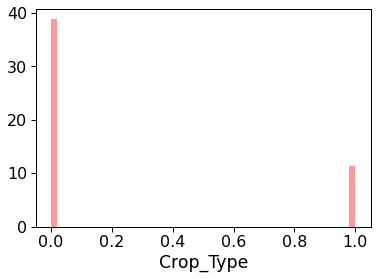

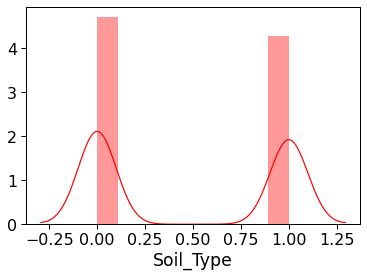

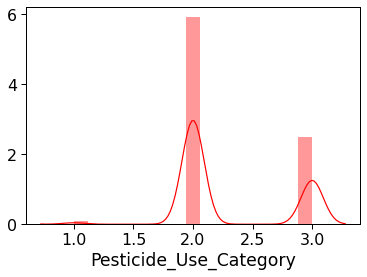

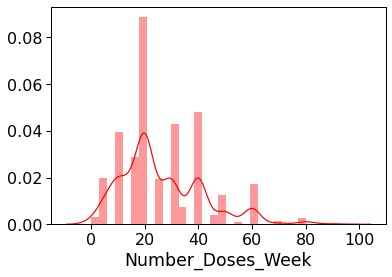

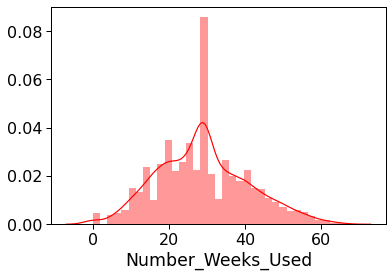

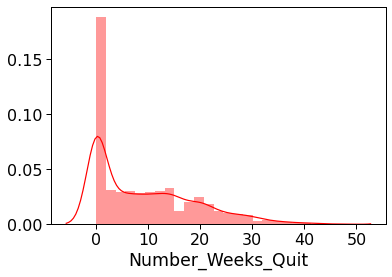

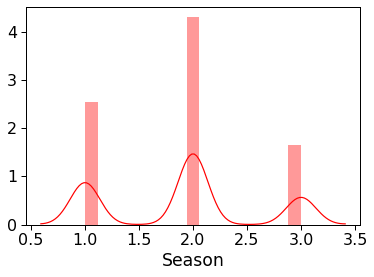

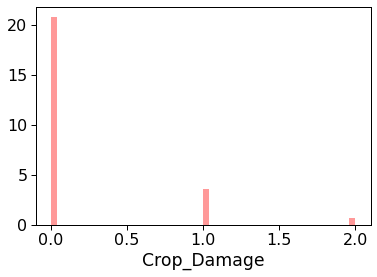

In [622]:
for col in train1.describe().columns:
    sns.distplot(train1[col],color='r')
    plt.show()

In [623]:
train1.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

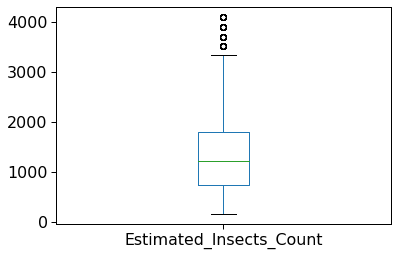

In [624]:
train1['Estimated_Insects_Count'].plot.box()

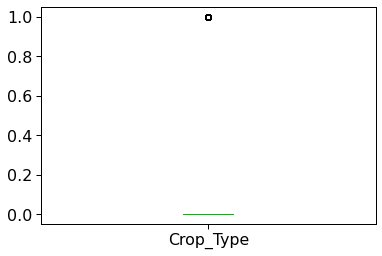

In [625]:
train1['Crop_Type'].plot.box()

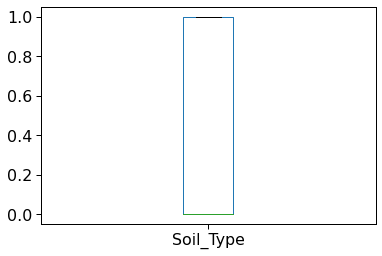

In [626]:
train1['Soil_Type'].plot.box()

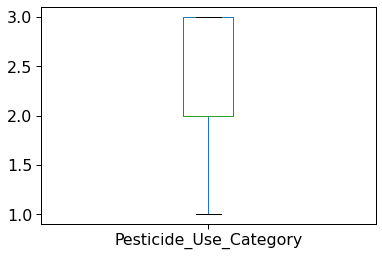

In [627]:
train1['Pesticide_Use_Category'].plot.box()

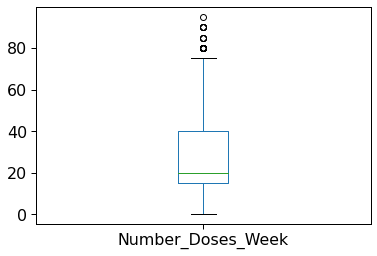

In [628]:
train1['Number_Doses_Week'].plot.box()

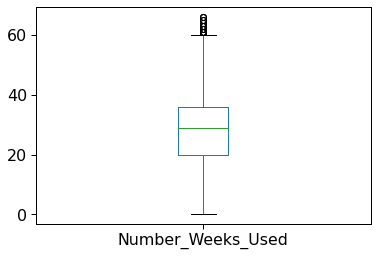

In [629]:
train1['Number_Weeks_Used'].plot.box()

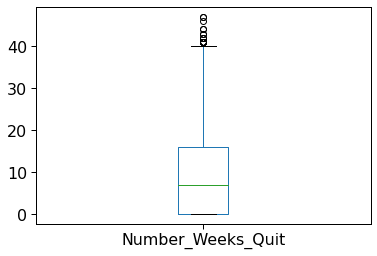

In [630]:
train1['Number_Weeks_Quit'].plot.box()

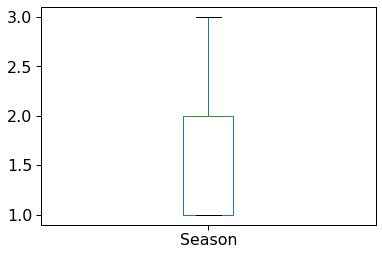

In [631]:
train1['Season'].plot.box()

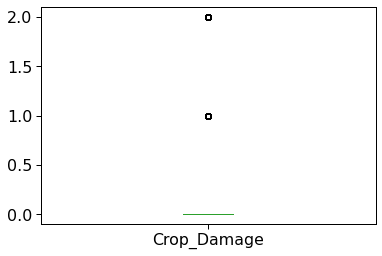

In [632]:
train1['Crop_Damage'].plot.box()

In [633]:
from scipy.stats import zscore
z=np.abs(zscore(train1))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [634]:
threshold =3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [635]:
train2=train1[(z<3).all(axis=1)]

In [636]:
print(train1.shape,'\t\t',train2.shape)

(4599, 9) 		 (4370, 9)


In [637]:
train2.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

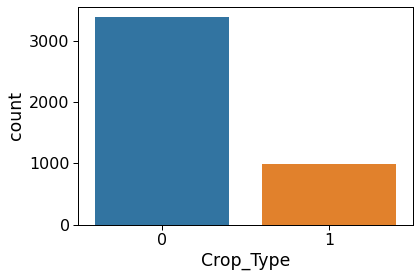

In [638]:
sns.countplot(x='Crop_Type',data=train2)

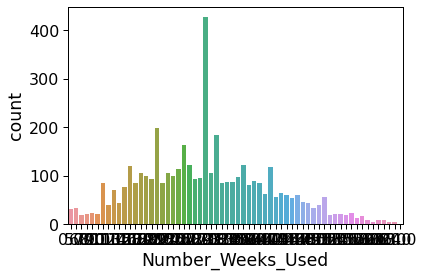

In [639]:
sns.countplot(x='Number_Weeks_Used',data=train2)

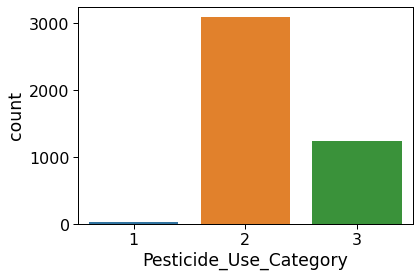

In [640]:
sns.countplot(x='Pesticide_Use_Category',data=train2)

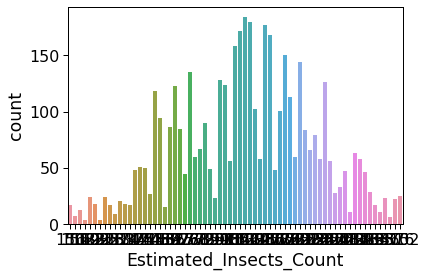

In [641]:
sns.countplot(x='Estimated_Insects_Count',data=train2)

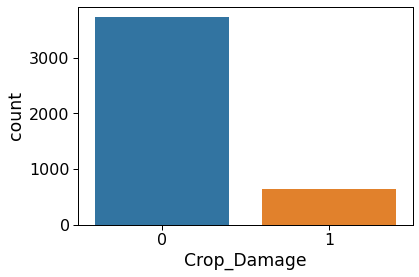

In [642]:
sns.countplot(x='Crop_Damage',data=train2)

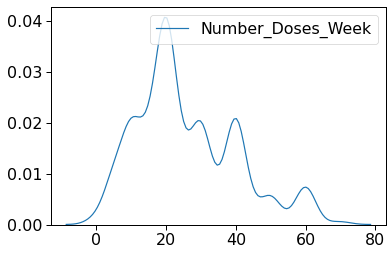

In [645]:
sns.kdeplot(train2['Number_Doses_Week'])

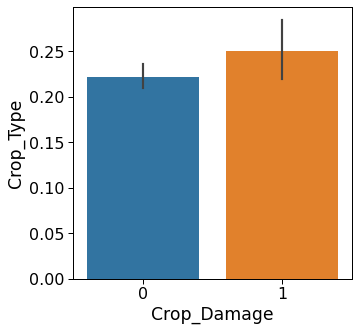

In [646]:
plt.figure(figsize=(5,5))
sns.barplot(x='Crop_Damage',y='Crop_Type', data=train2)
sns.set_context('paper', font_scale=2)

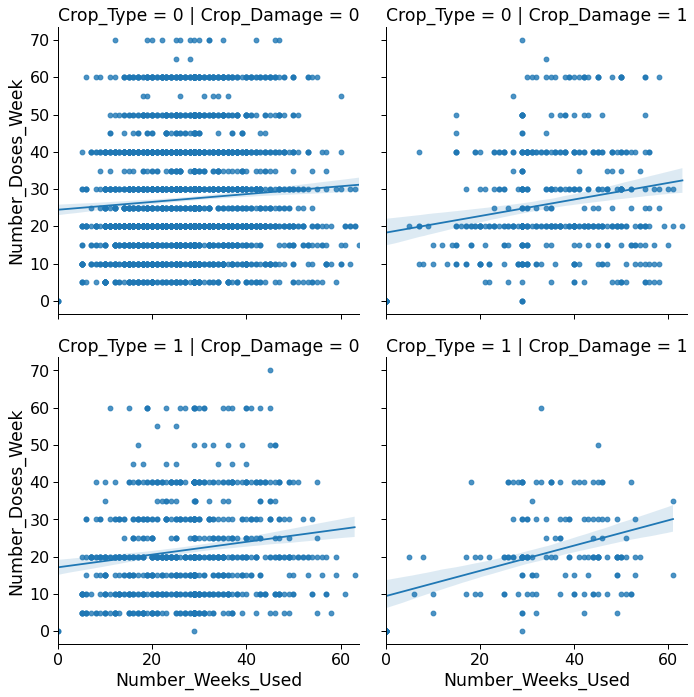

In [647]:
sns.set_context('paper', font_scale=1.8)
sns.lmplot(x='Number_Weeks_Used',y='Number_Doses_Week',col='Crop_Damage',row='Crop_Type',data=train2)

In [648]:
train2.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

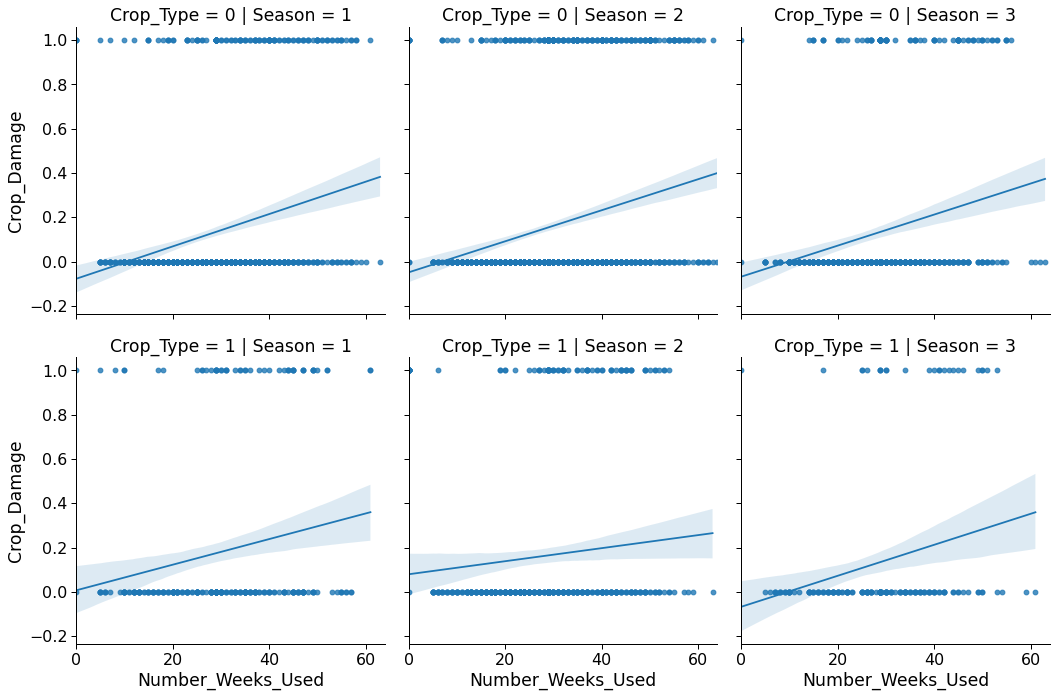

In [649]:
sns.set_context('paper', font_scale=1.8)
sns.lmplot(x='Number_Weeks_Used',y='Crop_Damage',col='Season',row='Crop_Type',data=train2)

In [650]:
#splitting the data into train and test set

In [651]:
X=train2.iloc[:, :-1]
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


In [652]:
y=train2.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [653]:
from sklearn.preprocessing import StandardScaler

In [654]:
ss= StandardScaler()
X= ss.fit_transform(X)

In [655]:
print(X.shape,'\t\t',y.shape)

(4370, 8) 		 (4370,)


In [656]:
from sklearn.model_selection import train_test_split,cross_val_score

In [657]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=9,stratify=y)

In [658]:
print(x_train.shape,X_test.shape)

(6, 8) (1311, 8)


In [659]:
print(y_train.shape,y_test.shape)

(3059,) (1311,)


In [660]:
#importing all the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [661]:
#importing all the Bossting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [662]:
#importing error metrics

In [663]:
# THINK WHICH MODEL CAN BE APPLIED OVER THE DATASET

In [664]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [665]:
KNN = KNeighborsClassifier(n_neighbors=4)
SV=SVC()

In [666]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=4)
GNB=GaussianNB()

In [667]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [668]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [669]:
Model = []
score = []
cvs = []
rocscore =[]
rocscore = []

*********** KNeighborsClassifier ****************


KNeighborsClassifier(n_neighbors=4)


Accuracy_score= 0.8504958047292144


Cross_Val_Score= 0.8194508009153318


roc_auc_score= 0.554303507596068


classification_report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1119
           1       0.46      0.14      0.21       192

    accuracy                           0.85      1311
   macro avg       0.67      0.55      0.56      1311
weighted avg       0.81      0.85      0.81      1311



[[1089   30]
 [ 166   26]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 
*********** SVC ****************


SVC()


Accuracy_score= 0.8596491228070176


Cross_Val_Score= 0.8329519450800916


roc_auc_score= 0.5273053507596068


classification_report
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      1119
           1       0.79      0.06      0.11       192

    accuracy                  

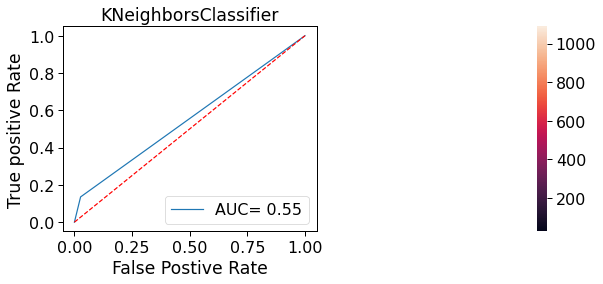

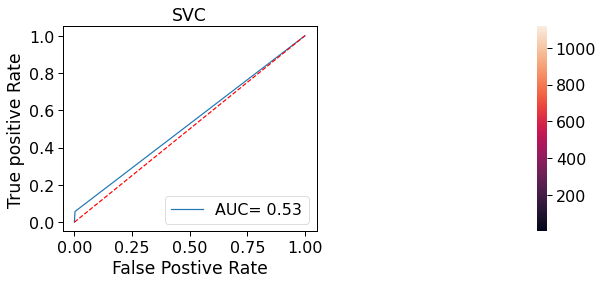

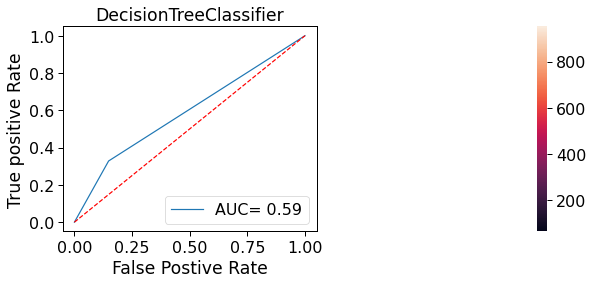

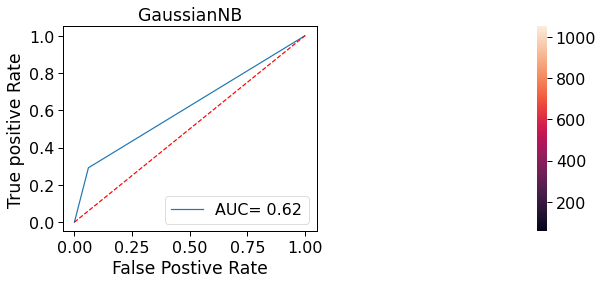

In [670]:
for name,model in models:
    print('***********',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,X,y, cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds,=roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=', roc_auc)
    rocscore.append(roc_auc *100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(921)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Postive Rate')
    print('\n \n ')

In [677]:
pre=model.predict(test)

AttributeError: 'list' object has no attribute 'predict'

In [671]:
AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [672]:
model=[BaggingClassifier(),ExtraTreesClassifier()]

In [673]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pre=m.predict(X_test)
    print('accuracy',m)
    print(accuracy_score(y_test,pre))
    print(confusion_matrix(y_test,pre))
    print('*************************')


accuracy BaggingClassifier()
0.8451563691838292
[[1071   48]
 [ 155   37]]
*************************
accuracy ExtraTreesClassifier()
0.8459191456903128
[[1067   52]
 [ 150   42]]
*************************


In [674]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [675]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[23:33:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { C, kernel } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Accuracy: 84.83 %
Best Parameters: {'C': 0.25, 'gamma': 0.9, 'kernel': 'rbf'}


In [676]:
#saving this model 
import joblib

#saving the model as a pickle in a file
joblib.dump(SV,'agriculture.plk')

['agriculture.plk']